In [1]:
pip --version

pip 20.0.2 from /Users/jbanerje/opt/anaconda3/lib/python3.7/site-packages/pip (python 3.7)
Note: you may need to restart the kernel to use updated packages.


In [2]:
%%capture
pip install prometheus-api-client

In [3]:
%%capture
pip install matplotlib

In [2]:
from prometheus_api_client import *
import prometheus_api_client
from prometheus_api_client.utils import parse_datetime, parse_timedelta
import matplotlib.pyplot as plt
import os
import numpy as np
import sys
import datetime
import pandas as pd
# import seaborn as sns
# # Set default Seaborn style
# sns.set(style="darkgrid")
# sns.set_context("talk", font_scale=1.4)
## hides ipython warnings
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (30, 10)
#plt.rcParams['figure.figsize'] = (20, 5)

In [3]:
print(prometheus_api_client.__version__)

0.4.1


In [4]:
# PROM URL is expected in this env variable
# like "https://prometheus-k8s-openshift-monitoring.apps.xxx.yyy.com/"
#url = os.environ.get("PROM_URL")
#url = "http://thanos-query-frontend.apps.bm.rdu2.scalelab.redhat.com/"
#url = "https://multicloud-console.apps.bm.rdu2.scalelab.redhat.com/observability-query/"
##url = "https://prometheus-k8s-openshift-monitoring.apps.bm.rdu2.scalelab.redhat.com/"
#########url = "http://thanos-query-frontend.apps.jbanerje-48fc8-tnsz2.dev05.red-chesterfield.com/"
url = "https://prometheus-k8s-openshift-monitoring.apps.playback-next.demo.red-chesterfield.com//"
#url = "https://prometheus-k8s-openshift-monitoring.apps.jbanerje-48fc8-lmvt9.dev05.red-chesterfield.com/"
# token: oc whoami --show-token
#token = os.environ.get("TOKEN")
token = "sha256~2L2PVN1JOw3CTBFfd0h8TSl30YgHNofzRNFGx5JNhO0"
#connects to prometheus
pc = PrometheusConnect(url=url, headers={"Authorization": "Bearer {}".format(token)}, disable_ssl=True);

### Sets the time range and time step for all queries below

In [5]:
start_time=(datetime.datetime.now() - datetime.timedelta(minutes=10080))
end_time=datetime.datetime.now()
step='1m'

In [127]:
cluster_cpu = pc.custom_query_range(
    query='cluster:cpu_usage_cores:sum', 
    start_time=start_time,
    end_time=end_time,
    step=step,
    params=my_label
)
print(type(cluster_cpu))

cluster_cpu_df = MetricRangeDataFrame(cluster_cpu);
cluster_cpu_df["value"]=cluster_cpu_df["value"].astype(float)
cluster_cpu_df.index= pd.to_datetime(cluster_cpu_df.index, unit="s")
cluster_cpu_df.reset_index(inplace=True)
#cluster_cpu_df.plot(title="Srujan's Master Stroke")


<class 'list'>


In [131]:
my_label = {'_id':'_id'}
current_metric = pc.get_current_metric_value(metric_name='cluster:cpu_usage_cores:sum',label_config=my_label)
print(current_metric)

[]


In [ ]:
print(cluster_cpu)

In [107]:
test_narray = np.array((cluster_cpu[0]['values']))
test_narray.shape
test_cluster_cpu_df = pd.DataFrame(test_narray,columns=['timestamp', 'Cpu_usage'])
test_cluster_cpu_df.timestamp= pd.to_datetime(test_cluster_cpu_df.timestamp, unit="s")
test_cluster_cpu_df["Cpu_usage"]=test_cluster_cpu_df["Cpu_usage"].astype(float)

In [108]:
test_cluster_cpu_df.head()

,timestamp,Cpu_usage
0,2022-05-24 20:30:30,11.103429
1,2022-05-24 20:31:30,11.450095
2,2022-05-24 20:32:30,10.912667
3,2022-05-24 20:33:30,10.694571
4,2022-05-24 20:34:30,10.944667


In [169]:
cluster_cpu_df.head()

,timestamp,__name__,value
0,2022-05-24 17:29:16,cluster:cpu_usage_cores:sum,10.660138
1,2022-05-24 17:30:16,cluster:cpu_usage_cores:sum,10.949905
2,2022-05-24 17:31:16,cluster:cpu_usage_cores:sum,11.310476
3,2022-05-24 17:32:16,cluster:cpu_usage_cores:sum,11.352000
4,2022-05-24 17:33:16,cluster:cpu_usage_cores:sum,10.811260


### Refer to this to add addons for jupiter-lab https://plotly.com/python/getting-started/#jupyterlab-support

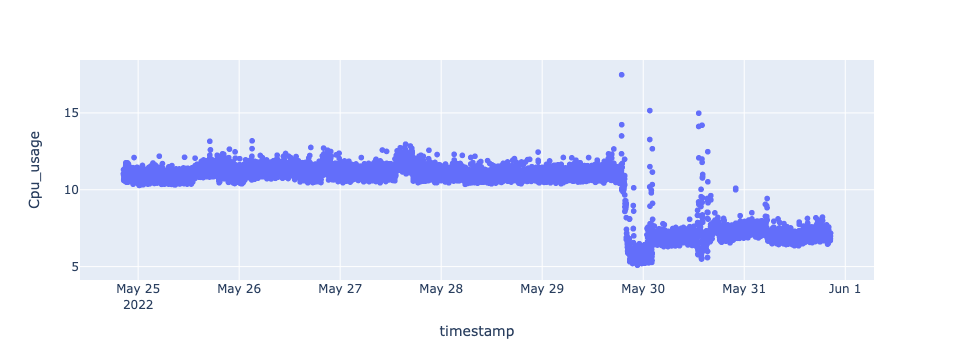

In [27]:
import plotly.express as px
fig = px.scatter(test_cluster_cpu_df, x="timestamp", y="Cpu_usage")
fig.show()

In [28]:
test_narray = np.array((cluster_memory[0]['values']))
test_narray.shape
test_cluster_memo_df = pd.DataFrame(test_narray,columns=['timestamp', 'Memory_usage(bytes)'])
test_cluster_memo_df.timestamp= pd.to_datetime(test_cluster_memo_df.timestamp, unit="s")
test_cluster_memo_df["Memory_usage(bytes)"]=test_cluster_memo_df["Memory_usage(bytes)"].astype(float)

In [17]:
cluster_memory = pc.custom_query_range(
    query='cluster:memory_usage_bytes:sum',
    start_time=start_time,
    end_time=end_time,
    step=step,
)
cluster_memory_df = MetricRangeDataFrame(cluster_memory);
cluster_memory_df = MetricRangeDataFrame(cluster_memory);
cluster_memory_df["value"]=cluster_memory_df["value"].astype(float)
cluster_memory_df.index= pd.to_datetime(cluster_memory_df.index, unit="s")
cluster_memory_df.reset_index(inplace=True)

In [115]:
cluster_memory_df.head()

,timestamp,__name__,value
0,2022-05-24 17:29:16,cluster:memory_usage_bytes:sum,7.837941e+10
1,2022-05-24 17:30:16,cluster:memory_usage_bytes:sum,7.845823e+10
2,2022-05-24 17:31:16,cluster:memory_usage_bytes:sum,7.916059e+10
3,2022-05-24 17:32:16,cluster:memory_usage_bytes:sum,7.945638e+10
4,2022-05-24 17:33:16,cluster:memory_usage_bytes:sum,7.950719e+10


In [18]:
cluster_memory_df.shape

(10081, 3)

In [29]:
test_cluster_memo_df.head()

,timestamp,Memory_usage(bytes)
0,2022-05-24 20:30:30,7.939569e+10
1,2022-05-24 20:31:30,7.941103e+10
2,2022-05-24 20:32:30,7.931800e+10
3,2022-05-24 20:33:30,7.887014e+10
4,2022-05-24 20:34:30,7.842979e+10


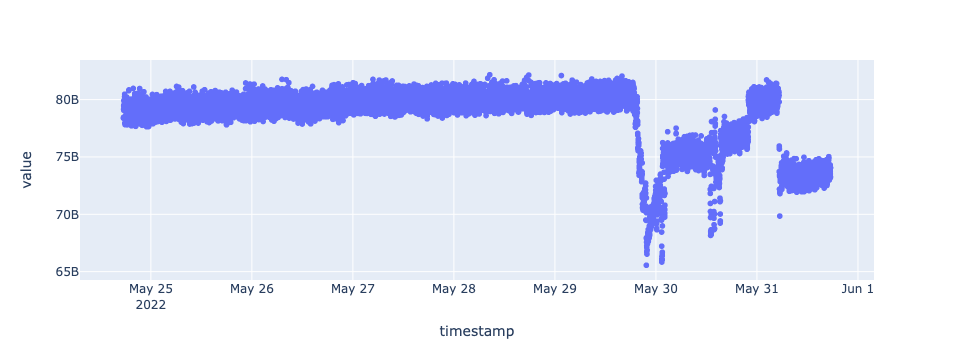

In [116]:
fig2 = px.scatter(cluster_memory_df, x="timestamp", y="value")
fig2.show()

In [30]:
cluster_capacity = pc.custom_query_range(
    query='cluster:capacity_memory_bytes:sum',
    start_time=start_time,
    end_time=end_time,
    step=step,
)
test_narray = np.array((cluster_capacity[0]['values']))
test_narray.shape
test_cluster_capacity_df = pd.DataFrame(test_narray,columns=['timestamp', 'Memory_capacity(bytes)'])
test_cluster_capacity_df.timestamp= pd.to_datetime(test_cluster_capacity_df.timestamp, unit="s")
test_cluster_capacity_df["Memory_capacity(bytes)"]=test_cluster_capacity_df["Memory_capacity(bytes)"].astype(float)

In [ ]:
test_cluster_capacity_df["Memory_capacity(bytes)"].unique()

array([9.93293599e+10])

In [40]:
test_cluster_memo_df.drop(columns=["timestamp"],inplace=True)
test_cluster_capacity_df.drop(columns=["timestamp"],inplace=True)

KeyError: "['timestamp'] not found in axis"

In [41]:
sample_df = pd.concat([test_cluster_cpu_df,test_cluster_memo_df,test_cluster_capacity_df],axis=1)

,timestamp,Cpu_usage,Memory_usage(bytes),Memory_capacity(bytes)
0,2022-05-24 20:30:30,11.048095,7.939569e+10,9.932936e+10
1,2022-05-24 20:31:30,11.307619,7.941103e+10,9.932936e+10
2,2022-05-24 20:32:30,10.950190,7.931800e+10,9.932936e+10
3,2022-05-24 20:33:30,10.637905,7.887014e+10,9.932936e+10
4,2022-05-24 20:34:30,10.954381,7.842979e+10,9.932936e+10


In [44]:
sample_df["Memory_usage"] = sample_df["Memory_usage(bytes)"]*100/sample_df["Memory_capacity(bytes)"]

In [81]:
sample_df.head()

,timestamp,Cpu_usage,Memory_usage(bytes),Memory_capacity(bytes),Memory_usage,year,month,day,hour,minute,second
0,2022-05-24 20:30:30,11.048095,7.939569e+10,9.932936e+10,79.931747,2022,5,24,20,30,30
1,2022-05-24 20:31:30,11.307619,7.941103e+10,9.932936e+10,79.947190,2022,5,24,20,31,30
2,2022-05-24 20:32:30,10.950190,7.931800e+10,9.932936e+10,79.853534,2022,5,24,20,32,30
3,2022-05-24 20:33:30,10.637905,7.887014e+10,9.932936e+10,79.402645,2022,5,24,20,33,30
4,2022-05-24 20:34:30,10.954381,7.842979e+10,9.932936e+10,78.959319,2022,5,24,20,34,30


In [104]:
sample_df.to_csv('sample_cluster_metrics_2.csv',index=False)

In [67]:
def split_timestamp(timestamp):
    timestamp_format = '%Y-%m-%d %H:%m:%s'
    dt_series = pd.to_datetime(timestamp,format=timestamp_format)
    return dt_series.dt.year, dt_series.dt.month,dt_series.dt.day, dt_series.dt.hour,dt_series.dt.minute,dt_series.dt.second
    
sample_df['year'],sample_df['month'],sample_df['day'], sample_df['hour'], sample_df['minute'], sample_df['second'],= split_timestamp(sample_df["timestamp"])


In [80]:
sample_df.tail()

,timestamp,Cpu_usage,Memory_usage(bytes),Memory_capacity(bytes),Memory_usage,year,month,day,hour,minute,second
10076,2022-05-31 20:26:30,6.836476,7.348714e+10,9.932936e+10,73.983305,2022,5,31,20,26,30
10077,2022-05-31 20:27:30,6.694857,7.341065e+10,9.932936e+10,73.906291,2022,5,31,20,27,30
10078,2022-05-31 20:28:30,6.811524,7.365159e+10,9.932936e+10,74.148857,2022,5,31,20,28,30
10079,2022-05-31 20:29:30,6.984476,7.377087e+10,9.932936e+10,74.268946,2022,5,31,20,29,30
10080,2022-05-31 20:30:30,7.180857,7.433705e+10,9.932936e+10,74.838955,2022,5,31,20,30,30


In [84]:
cluster_api_server = pc.custom_query_range(
    query='cluster:apiserver_current_inflight_requests:sum:max_over_time:2m',
    start_time=start_time,
    end_time=end_time,
    step=step,
)
test_narray = np.array((cluster_api_server[0]['values']))
test_narray.shape
cluster_api_server_df = pd.DataFrame(test_narray,columns=['timestamp', 'api_server_requests'])
cluster_api_server_df.timestamp= pd.to_datetime(cluster_api_server_df.timestamp, unit="s")
print(cluster_api_server_df.tail())
#cluster_api_server_df["api_server_requests"]=cluster_api_server_df["api_server_requests"].astype(float)

                timestamp api_server_requests
10076 2022-05-31 20:26:30                  19
10077 2022-05-31 20:27:30                  18
10078 2022-05-31 20:28:30                  19
10079 2022-05-31 20:29:30                  20
10080 2022-05-31 20:30:30                  20


In [85]:
cluster_api_server_df.drop(columns=["timestamp"])
sample_df = pd.concat([sample_df,cluster_api_server_df],axis=1)

In [87]:
sample_df.drop(columns=["timestamp"],inplace=True)

In [89]:
cluster_api_server_df.drop(columns=["api_server_requests"],inplace=True)


In [91]:
sample_df = pd.concat([cluster_api_server_df,sample_df],axis=1)
sample_df.head()

,timestamp,Cpu_usage,Memory_usage(bytes),Memory_capacity(bytes),Memory_usage,year,month,day,hour,minute,second,api_server_requests
0,2022-05-24 20:30:30,11.048095,7.939569e+10,9.932936e+10,79.931747,2022,5,24,20,30,30,20
1,2022-05-24 20:31:30,11.307619,7.941103e+10,9.932936e+10,79.947190,2022,5,24,20,31,30,20
2,2022-05-24 20:32:30,10.950190,7.931800e+10,9.932936e+10,79.853534,2022,5,24,20,32,30,24
3,2022-05-24 20:33:30,10.637905,7.887014e+10,9.932936e+10,79.402645,2022,5,24,20,33,30,24
4,2022-05-24 20:34:30,10.954381,7.842979e+10,9.932936e+10,78.959319,2022,5,24,20,34,30,21


In [96]:
cluster_met_df["api_server_requests"]=sample_df["api_server_requests"].astype(float)

In [10]:
cluster_met = pc.custom_query_range(
    query='{__name__=~"cluster:cpu_usage_cores:sum|cluster:memory_usage_bytes:sum"}',
    start_time=start_time,
    end_time=end_time,
    step=step,
)
print(type(cluster_met))

cluster_met_df = MetricRangeDataFrame(cluster_met);
print(cluster_met_df.head())
cluster_met_df["value"]=cluster_met_df["value"].astype(float)
cluster_met_df.index= pd.to_datetime(cluster_met_df.index, unit="s")
cluster_met_df.reset_index(inplace=True)

<class 'list'>
                               __name__               value
timestamp                                                  
1653424230  cluster:cpu_usage_cores:sum   11.04809523809236
1653424290  cluster:cpu_usage_cores:sum  11.307619047615058
1653424350  cluster:cpu_usage_cores:sum  10.950190476195091
1653424410  cluster:cpu_usage_cores:sum  10.637904761909024
1653424470  cluster:cpu_usage_cores:sum  10.954380952389467


In [14]:
print(cluster_met_df.__name__.unique())
print(cluster_met_df.shape)

['cluster:cpu_usage_cores:sum' 'cluster:memory_usage_bytes:sum']
(20162, 3)


In [ ]:
fig3 = px.scatter(sample_df, x="timestamp", color="Cpu_usage",y="Memory_usage")
fig3.show()

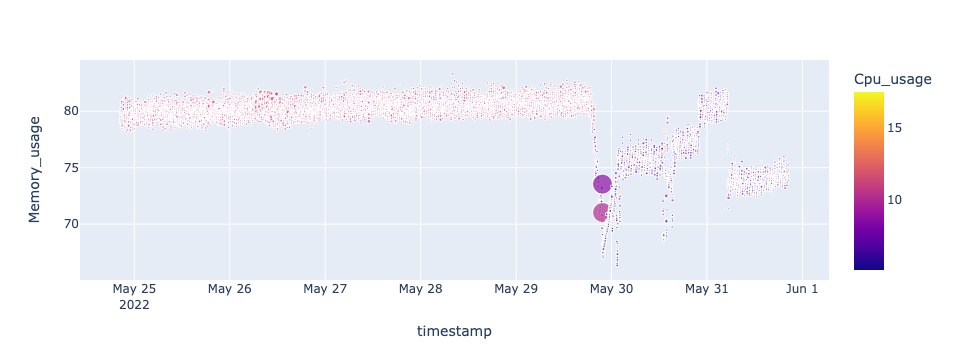

In [103]:
fig4 = px.scatter(sample_df, x="timestamp", color="Cpu_usage",y="Memory_usage",size='api_server_requests')
fig4.show()

In [ ]:
#cluster:capacity_memory_bytes:sum

In [121]:
chunk_size = parse_timedelta("now", "1d")
cluster_cpu_ranged_data = pc.get_metric_range_data(
    metric_name="cluster:capacity_cpu_cores:sum",
    start_time=start_time,
    end_time=end_time,
    chunk_size=chunk_size,
)

In [122]:
for metric in cluster_mem_ranged_data:
    print(metric["metric"], "\n")

{'__name__': 'cluster:capacity_cpu_cores:sum', 'label_beta_kubernetes_io_instance_type': 'm5.2xlarge', 'label_kubernetes_io_arch': 'amd64', 'label_node_openshift_io_os_id': 'rhcos'} 

{'__name__': 'cluster:capacity_cpu_cores:sum', 'label_beta_kubernetes_io_instance_type': 'm5.2xlarge', 'label_kubernetes_io_arch': 'amd64', 'label_node_openshift_io_os_id': 'rhcos', 'label_node_role_kubernetes_io': 'master'} 

{'__name__': 'cluster:capacity_cpu_cores:sum', 'label_beta_kubernetes_io_instance_type': 'm5.2xlarge', 'label_kubernetes_io_arch': 'amd64', 'label_node_openshift_io_os_id': 'rhcos'} 

{'__name__': 'cluster:capacity_cpu_cores:sum', 'label_beta_kubernetes_io_instance_type': 'm5.2xlarge', 'label_kubernetes_io_arch': 'amd64', 'label_node_openshift_io_os_id': 'rhcos', 'label_node_role_kubernetes_io': 'master'} 

{'__name__': 'cluster:capacity_cpu_cores:sum', 'label_beta_kubernetes_io_instance_type': 'm5.2xlarge', 'label_kubernetes_io_arch': 'amd64', 'label_node_openshift_io_os_id': 'rhco

In [123]:
print(len(cluster_cpu_ranged_data))
metrics_object_list = MetricsList(cluster_cpu_ranged_data)

14


In [124]:
for item in metrics_object_list:
    print(type(item))

<class 'prometheus_api_client.metric.Metric'>
<class 'prometheus_api_client.metric.Metric'>


In [125]:
for item in metrics_object_list:
    print(item)
    #print(item.metric_name, item.label_config, "\n")

{
metric_name: 'cluster:capacity_cpu_cores:sum'
label_config: {'label_beta_kubernetes_io_instance_type': 'm5.2xlarge', 'label_kubernetes_io_arch': 'amd64', 'label_node_openshift_io_os_id': 'rhcos'}
metric_values:                                  ds   y
0     2022-05-24 17:29:20.381999872  24
1     2022-05-24 17:29:50.381999872  24
2     2022-05-24 17:30:20.381999872  24
3     2022-05-24 17:30:50.381999872  24
4     2022-05-24 17:31:20.381999872  24
...                             ...  ..
20155 2022-05-31 17:26:50.381999872  24
20156 2022-05-31 17:27:20.381999872  24
20157 2022-05-31 17:27:50.381999872  24
20158 2022-05-31 17:28:20.381999872  24
20159 2022-05-31 17:28:50.381999872  24

[20160 rows x 2 columns]
}
{
metric_name: 'cluster:capacity_cpu_cores:sum'
label_config: {'label_beta_kubernetes_io_instance_type': 'm5.2xlarge', 'label_kubernetes_io_arch': 'amd64', 'label_node_openshift_io_os_id': 'rhcos', 'label_node_role_kubernetes_io': 'master'}
metric_values:                        

In [126]:
metric_object_chunk_list = []
for raw_metric in cluster_mem_ranged_data:
    metric_object_chunk_list.append(Metric(raw_metric))

In [127]:
print(metric_object_chunk_list[0] == metric_object_chunk_list[2])

True


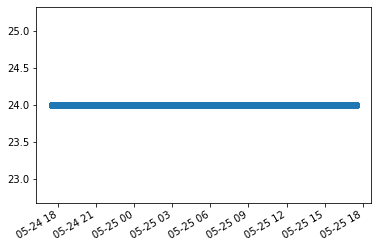

In [128]:
metric_object_chunk_list[0].plot()

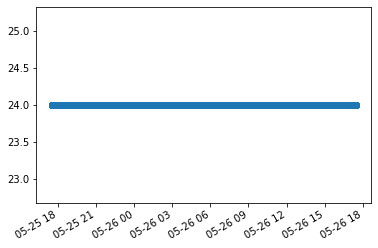

In [129]:
metric_object_chunk_list[2].plot()

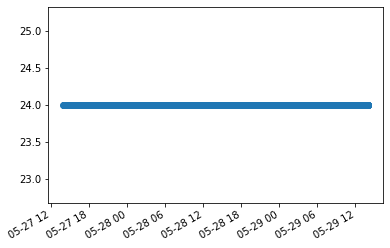

In [98]:
(metric_object_chunk_list[0]+metric_object_chunk_list[2]).plot()